In [3]:
# Jeff Powell
# 11/15/23
# CSC295
# Program that utilizes various classifying models from scikit to identify hand drawn numbers.

In [2]:
# load packages
import matplotlib.image as mpimg
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import os as os
import numpy as np
import matplotlib.pyplot as plt
import sys

ModuleNotFoundError: No module named 'matplotlib'

In [5]:
# load train_dataset
train_dataset = []
y_train = []
for label in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 
    img_path = os.path.join('./data', 'train', str(label))
    for img in os.listdir(img_path):
        image = mpimg.imread(os.path.join(img_path, img))
        #test for image size and append to train_dataset list if 28x28 pixel image
        if image.shape == (28, 28):
            train_dataset.append(image)
            y_train.append(label)

#load test_dataset
test_dataset = []
y_test = []
for label in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 
    img_path = os.path.join('./data', 'test', str(label))
    for img in os.listdir(img_path):
        image = mpimg.imread(os.path.join(img_path, img))
        #test for image size and append to train_dataset list if 28x28 pixel image
        if image.shape == (28, 28):
            test_dataset.append(image)
            y_test.append(label)

print('The number of Training Data: ', len(train_dataset))
print('The number of Testing Data: ', len(test_dataset))
print('The size of images: ', train_dataset[0].shape)

The number of Training Data:  60000
The number of Testing Data:  10000
The size of images:  (28, 28)


In [6]:
# convert images into vectors
train_reshaped = np.array(train_dataset)
test_reshaped = np.array(test_dataset)

train_reshaped = train_reshaped.reshape(-1, 784)
test_reshaped = test_reshaped.reshape(-1, 784)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(train_reshaped.shape)
print(test_reshaped.shape)

(60000, 784)
(10000, 784)


In [7]:
# train the classifier (choose one from the three options)
# model = LogisticRegression(max_iter=1_000_000_000)
model = LogisticRegression(solver='liblinear', penalty='l1', C=.01)
# model = LogisticRegression()
# model = KNeighborsClassifier()
model.fit(train_reshaped, y_train)
y_model = model.predict(test_reshaped)

In [8]:
# determine accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_model, y_test)

0.9233

Predicted value: 0   Acual value: 0


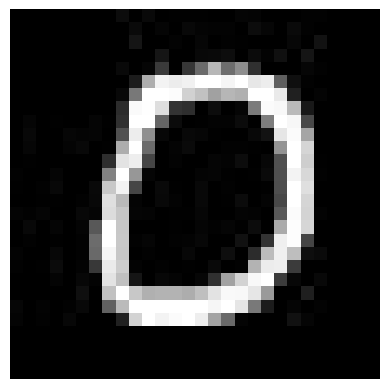

Predicted value: 0   Acual value: 0


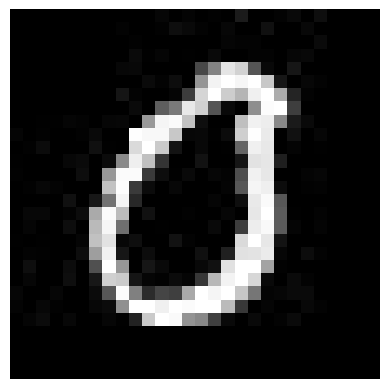

Predicted value: 1   Acual value: 1


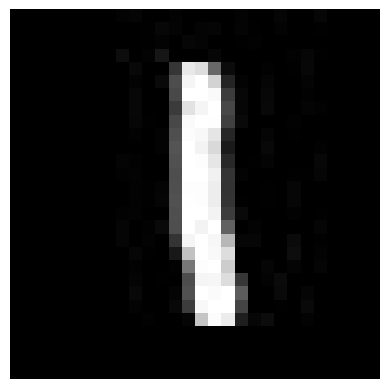

Predicted value: 1   Acual value: 1


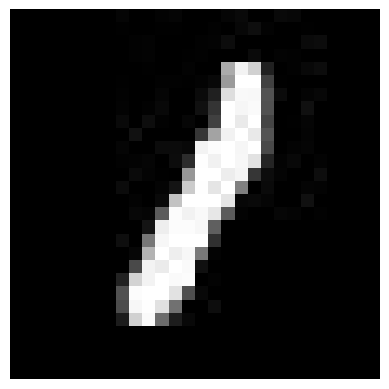

Predicted value: 1   Acual value: 1


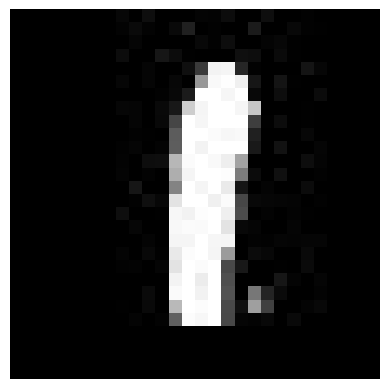

Predicted value: 2   Acual value: 2


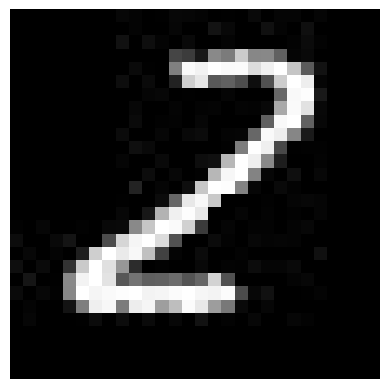

Predicted value: 2   Acual value: 2


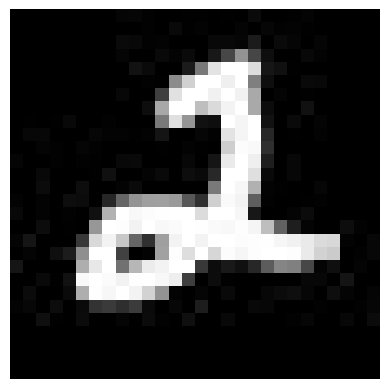

Predicted value: 3   Acual value: 3


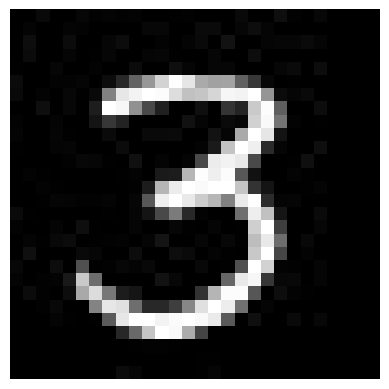

Predicted value: 3   Acual value: 3


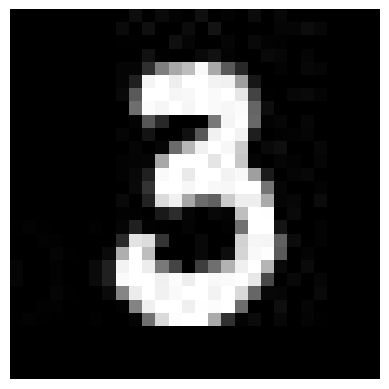

Predicted value: 4   Acual value: 4


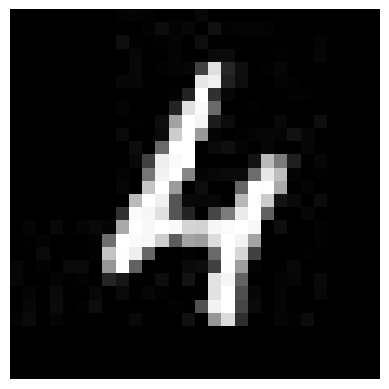

Predicted value: 4   Acual value: 4


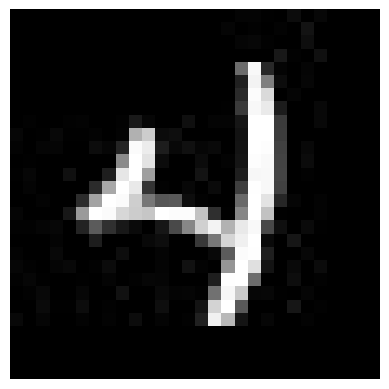

Predicted value: 8   Acual value: 5


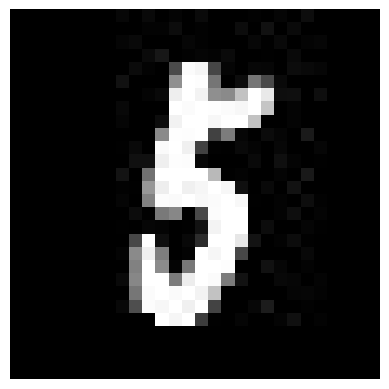

Predicted value: 5   Acual value: 5


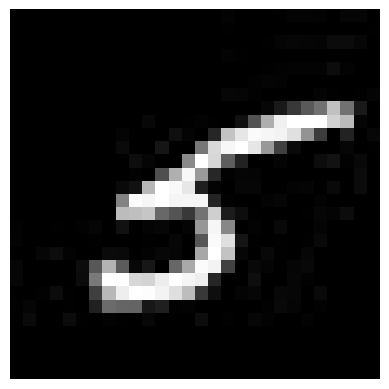

Predicted value: 6   Acual value: 6


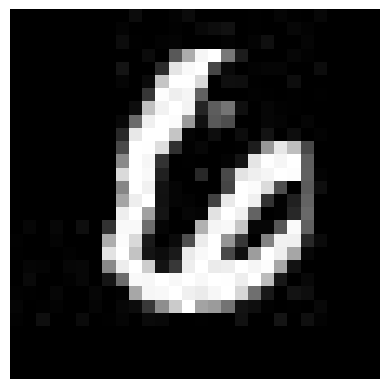

Predicted value: 7   Acual value: 7


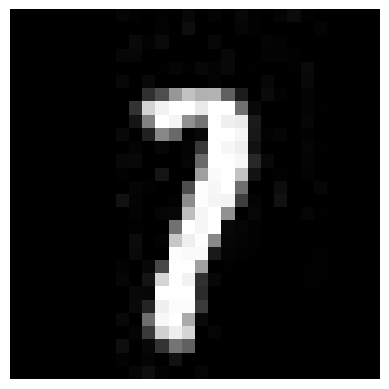

Predicted value: 7   Acual value: 7


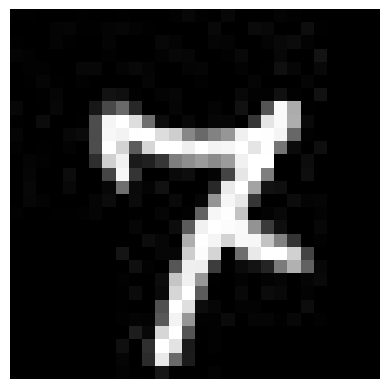

Predicted value: 7   Acual value: 7


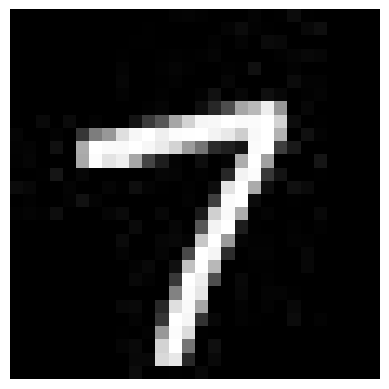

Predicted value: 8   Acual value: 8


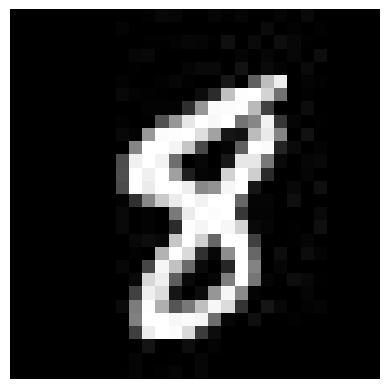

Predicted value: 9   Acual value: 9


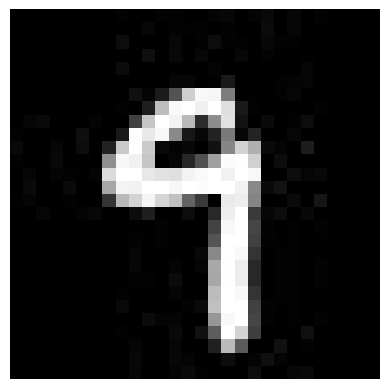

Predicted value: 9   Acual value: 9


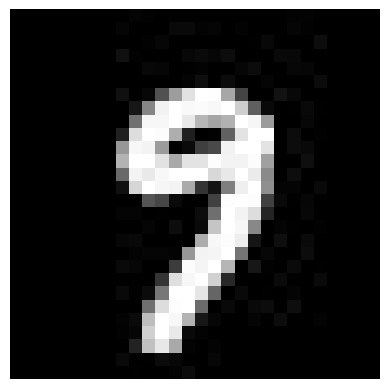

In [9]:
# display every 500th image
for idx, img in enumerate(test_dataset):
    if idx % 500 != 0:
        continue
    print('Predicted value:', y_model[idx], '  Acual value:', y_test[idx])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

In [10]:
# LinearSVC had a runtime of 3 minutes and 52 seconds, and an accuracy of 88.9%

# KNeighhborsClassifier had a runtime of 19 seconds (!) and an accuracy of 96.8% (!!). 
# Library uses a default of k = 5 neighbors

# The default LogisticRegression had a runtime of 22 minutes and 19 seconds with an accuracy of 91.4%. 
# I allowed it 1 billion iterations.
# I used a different solver and set of constants which brought the runtime down to 1 minute and 31 seconds,
# and accuracy up to 92.3%. Interestingly, one of this models misclassifications occurs in the printed images
# above, and it mispredicts a five as an eight.

# KNeighborsClassifier was the best by far. It ran in about 1.4% the time of the default LogisticRegression, 
# and reached the highest accuracy.